<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/2DeepLearning_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Science va Sun'iy Intellekt Praktikum

## 6-MODUL. Deep Learning

## ll-qism

### Loyiha va uni maxsulotga aylantirish

In [ ]:
import torch
torch.cuda.is_available()

True

##Kutubxonalarni o'rnatib olamiz
### Bizga kerak bo'ladi
- `fastai==2.7.15` versiyasi
- `torch==2.3.0+cu121` versiyasi

In [ ]:
# Kutubxonalarni yuklab olish
import torch
import fastai
# !pip install fastai==2.5.3  kerakli versiyani o'rnatish yangi versiya o'rnatgandan keyin restart runtime qilish kerak bo'ladi

# versiyalarni tekshirish
print(torch.__version__)
print(fastai.__version__)

2.3.0+cu121
2.7.15


## Dataset
### Dataset yuklab olish uchun `Google`ning `Open_Images_Dataset_v4` ochiq ma'lumotlaridan foydalanamiz. Bu dataset `600` ta class dan iborat `1.7 mln` rasmni o'z ichiga olgan
###Bu rasmlarni yuklab olish uchun `OIDv4_ToolKit` dan foydalanamiz. (`https://github.com/EscVM/OIDv4_ToolKit`)

###`OIDv4_ToolKit`ni yuklab olish

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git
!cd OIDv4_ToolKit && pip install -r requirements.txt

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 41.20 MiB/s, done.
Resolving deltas: 100% (146/146), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


help

In [ ]:
# !cd OIDv4_ToolKit && python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated (h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0] [--image_IsGroupOf 1 or 0]
               [--image_IsDepiction 1 or 0] [--image_IsInside 1 or 0]
               [--multiclasses 0 (default) or 1] [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

options:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID dataset folder
  -y, --yes

#### Biz bu loyiha uchun 3 turdagi (Avtomobil, Samolyot, Suv transportlari (kema, qayiq)) transportlarni klassifikatsiya qila oladigan model quramiz. Shuning uchun ham OIDv4_ToolKit yordamida har bir klass uchun `200` tadan rasm yuklaymiz

In [ ]:
! cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 66507 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

##Model

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path = Path('train')

# Rasmlarni yuklashda kamchilik bor yoki yo'qligini tekshirish
# fls = get_image_files(path)
# failed = verify_images(path)

# Datablock yaratamiz
transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

# Dataloader yaratamiz
dls = transports.dataloaders(path)

# datasetni tekshirish
# dls.train.show_batch(max_n=32, nrows=4)

# O'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 125MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.248127,0.345116,0.833333,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.373288,0.281222,0.875000,00:09
1,0.268928,0.338832,0.891667,00:07
2,0.188753,0.352163,0.883333,00:09
3,0.147466,0.354844,0.883333,00:09


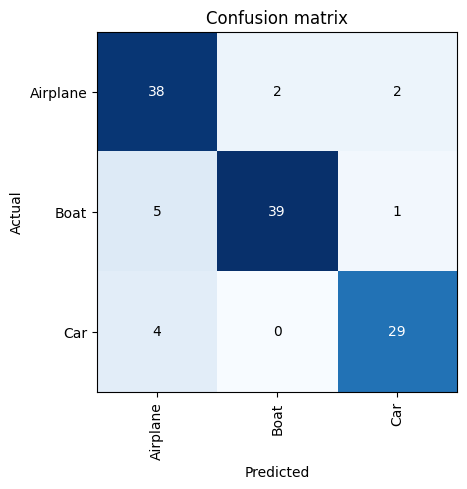

In [ ]:
# tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

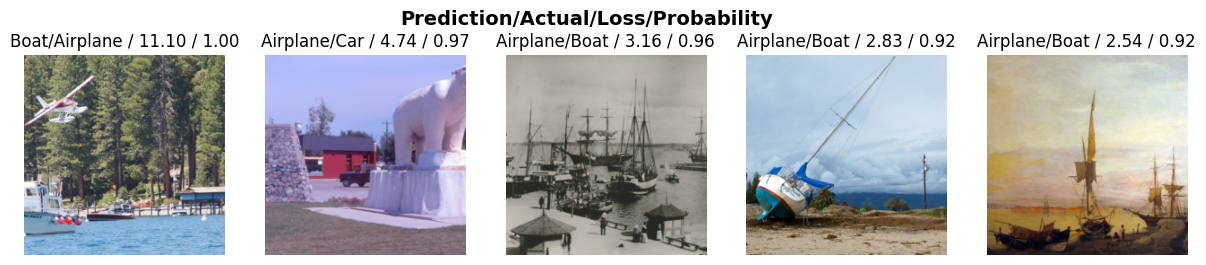

In [ ]:
interp.plot_top_losses(5, nrows=1)

## Modelni tekshirib ko'ramiz

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:Boat
Ehtimollik: 100.0%


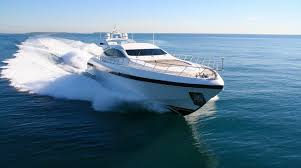

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Bashorat:{pred}")
print(f"Ehtimollik: {probs[pred_id]*100:.1f}%")
img